In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df_loan_result = pd.read_csv('/content/drive/Shareddrives/빅콘테스트_노란오리/data/loan_result.csv')
df_log_data = pd.read_csv('/content/drive/Shareddrives/빅콘테스트_노란오리/data/log_data.csv')
df_user_spec = pd.read_csv('/content/drive/Shareddrives/빅콘테스트_노란오리/data/user_spec.csv')

In [4]:
merge_1_2=pd.merge(df_loan_result,df_user_spec)

In [5]:
train_x = merge_1_2[merge_1_2['is_applied'].notnull()] #traindata

In [6]:
print(train_x.corr(method='pearson'))

                                     application_id   bank_id  product_id  \
application_id                             1.000000 -0.000445    0.000288   
bank_id                                   -0.000445  1.000000    0.129040   
product_id                                 0.000288  0.129040    1.000000   
loan_limit                                -0.000477 -0.030172    0.009796   
loan_rate                                  0.000482 -0.150268   -0.137457   
is_applied                                 0.000415  0.015787    0.034671   
user_id                                   -0.000910  0.000210   -0.000057   
birth_year                                -0.002602  0.003800    0.011904   
gender                                     0.000767  0.008993    0.015333   
credit_score                              -0.001490 -0.007869    0.016789   
yearly_income                              0.001153 -0.000811   -0.004200   
company_enter_month                       -0.001909 -0.006200    0.013225   

In [6]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

#warning
import warnings
warnings.filterwarnings('ignore')
from scipy import stats 

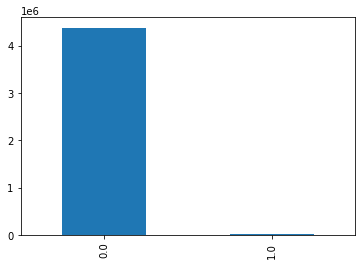

In [8]:
train_x['personal_rehabilitation_yn'].value_counts().plot.bar()

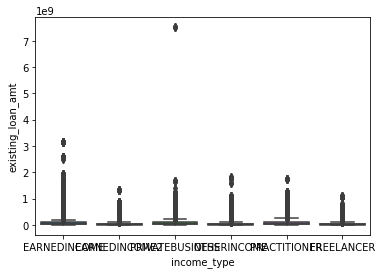

In [11]:
#근로형태별 기대출금액
sns.boxplot(x='income_type',y='existing_loan_amt',data=train_x) 
sns.set(font_scale=0.09)

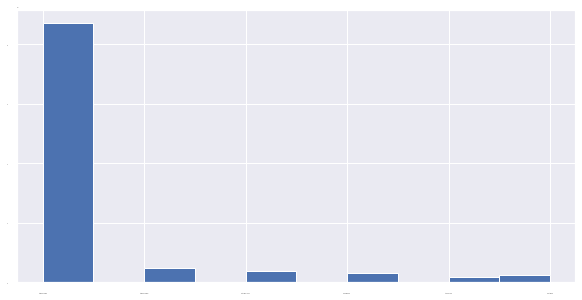

In [21]:
#근로형태 히스토그램
plt.figure(figsize=(10,5))
train_x['income_type'].hist()
plt.show() 

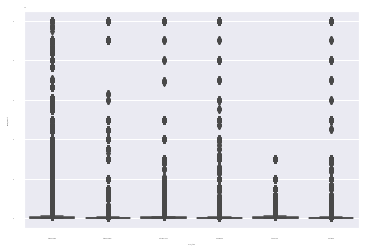

In [22]:
sns.boxplot(x='income_type',y='desired_amount',data=train_x) 
sns.set(font_scale=1)

In [23]:
def age_categorize(birth_year):
  birth_year = (((2022-birth_year+1)//10)*10)
  return birth_year

In [24]:
Age_category=train_x.birth_year.apply(age_categorize)

In [25]:
Age_category=Age_category.fillna(0)
train_x['Age_category']=Age_category
train_x['Age_category']=train_x['Age_category'].astype(int)

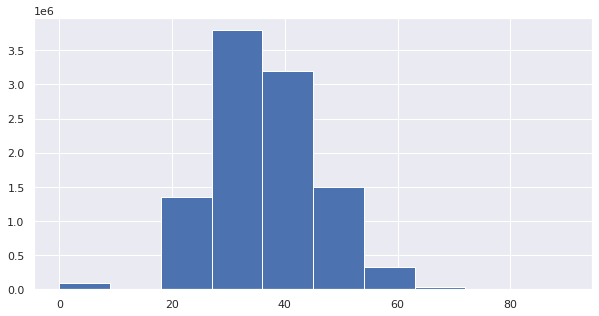

In [26]:
#나이대별 빈도수 히스토그램
plt.figure(figsize=(10,5))
train_x['Age_category'].hist()
plt.show() 

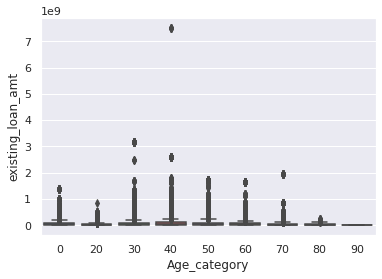

In [27]:
#나이대별 기대출금액 boxplot
sns.boxplot(x=train_x['Age_category'],y=train_x['existing_loan_amt'],data=train_x)

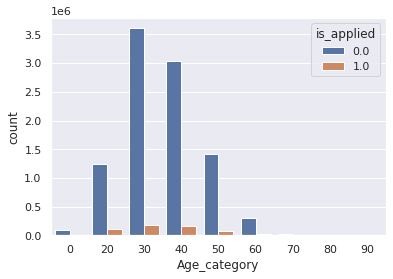

In [28]:
#나이대별 대출신청여부
sns.countplot(x='Age_category',data=train_x,hue='is_applied')

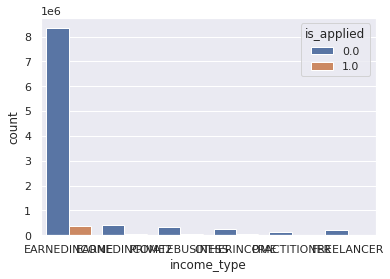

In [29]:
#근로형태별 대출신청여부
sns.countplot(x='income_type',data=train_x,hue='is_applied')

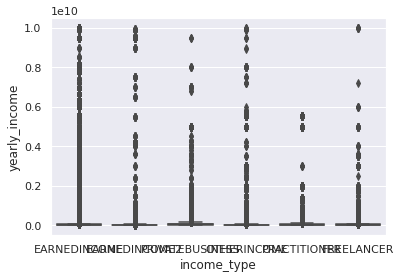

In [30]:
sns.boxplot(x='income_type',y='yearly_income',data=train_x)

[Text(0.5, 1.0, 'corr')]

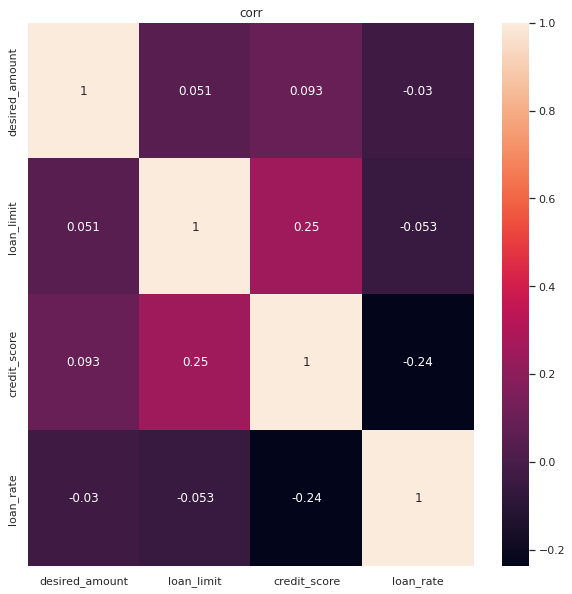

In [31]:
corr = train_x[['desired_amount','loan_limit','credit_score' , 'loan_rate']].corr()
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(corr,annot = True)
ax.set(title = 'corr')

[Text(0.5, 1.0, 'corr')]

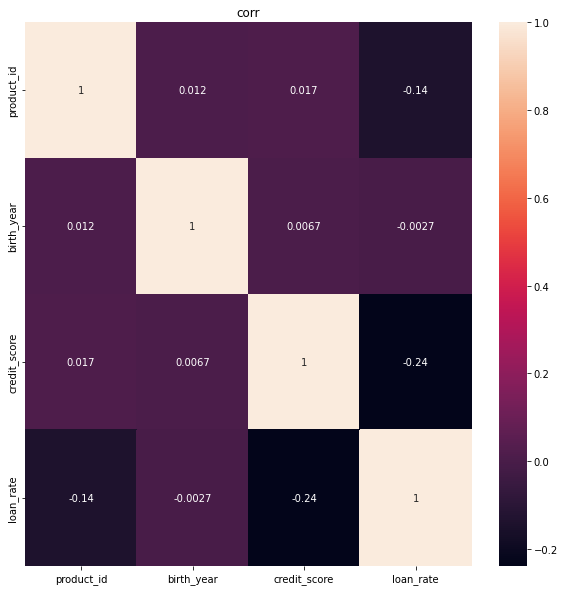

In [9]:
corr = train_x[['product_id','birth_year','credit_score' , 'loan_rate']].corr()
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(corr,annot = True)
ax.set(title = 'corr')

In [37]:
(train_x['is_applied'][train_x['is_applied']==1.0].sum()/len(train_x)).round(2) 

0.05

In [36]:
train_x['is_applied'].value_counts()

0.0    9709675
1.0     560336
Name: is_applied, dtype: int64

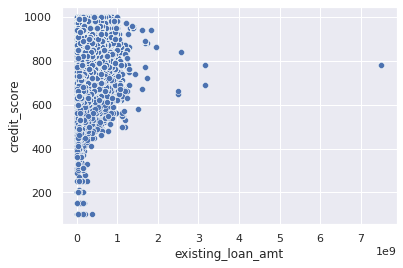

In [39]:
sns.scatterplot(data=train_x,x='existing_loan_amt', y='credit_score')

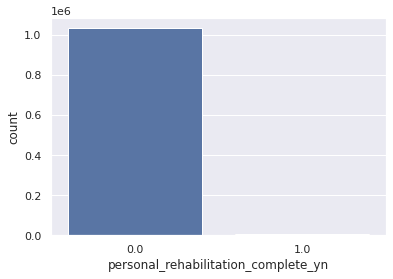

In [41]:
sns.countplot(data=train_x,x='personal_rehabilitation_complete_yn')

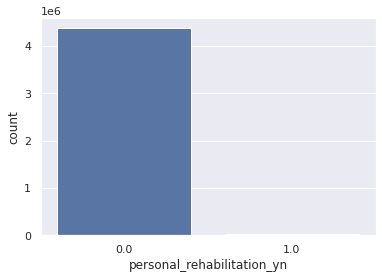

In [43]:
sns.countplot(data=train_x,x='personal_rehabilitation_yn')

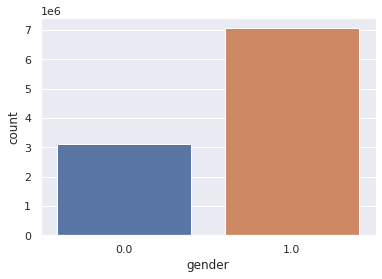

In [45]:
sns.countplot(data=train_x,x='gender')

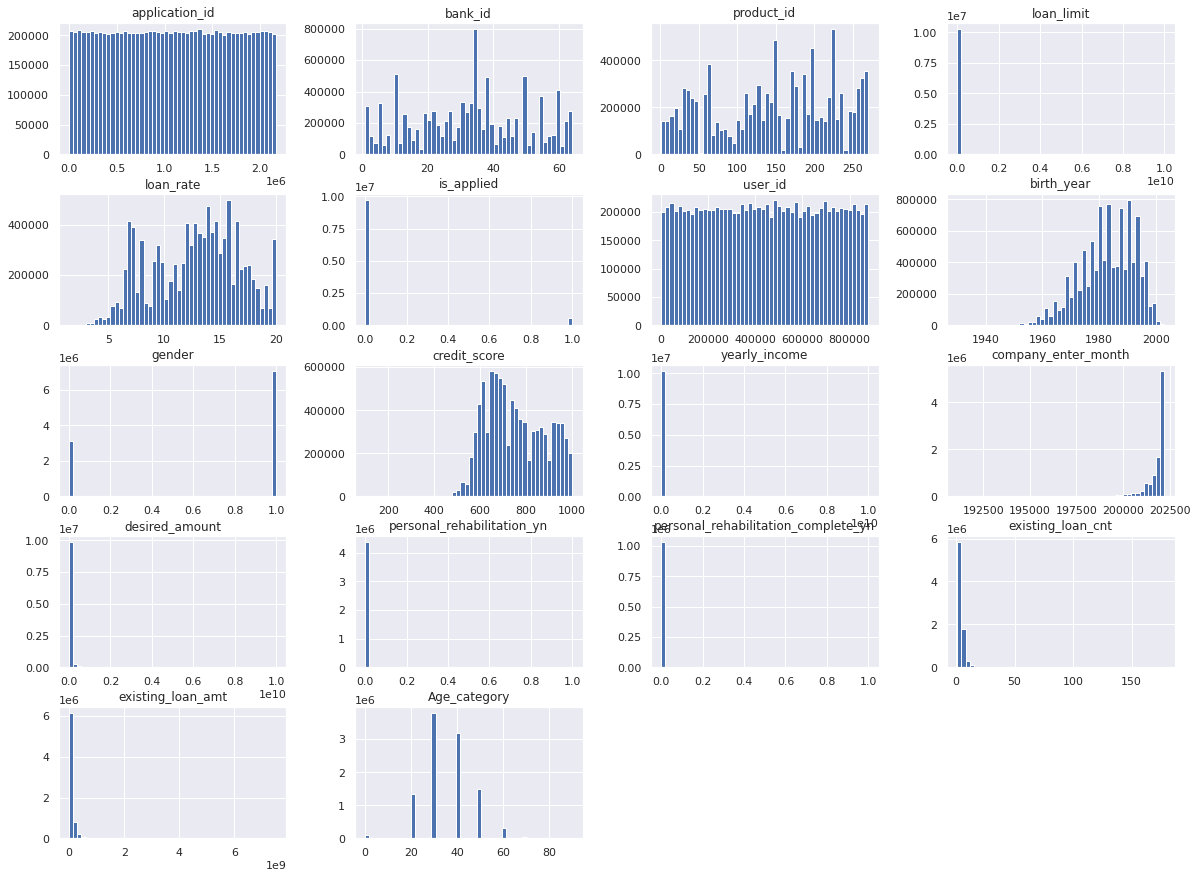

In [46]:
train_x.hist(bins=50,figsize=(20,15))
plt.show()

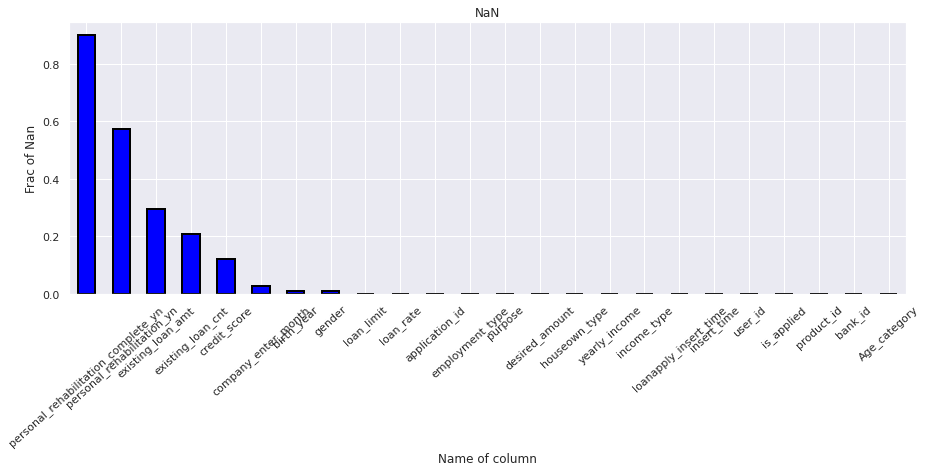

In [47]:
train_x.isna().mean().sort_values(ascending=False).plot( kind='bar', figsize=(15,5),  grid=True, color='blue', edgecolor='black', linewidth=2, rot=42)
plt.title('NaN')
plt.xlabel('Name of column')
plt.ylabel('Frac of Nan')
plt.show()

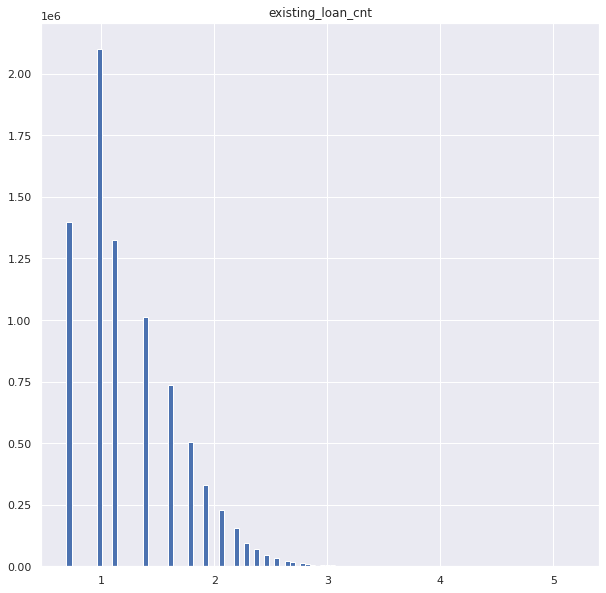

In [54]:
log_df2 = np.log(train_x['existing_loan_cnt'])
log_df2=pd.DataFrame(log_df2)
log_df2[(log_df2 <= 0)] = 1
log_df2.hist(bins=100,figsize=(10,10)) 
plt.show()

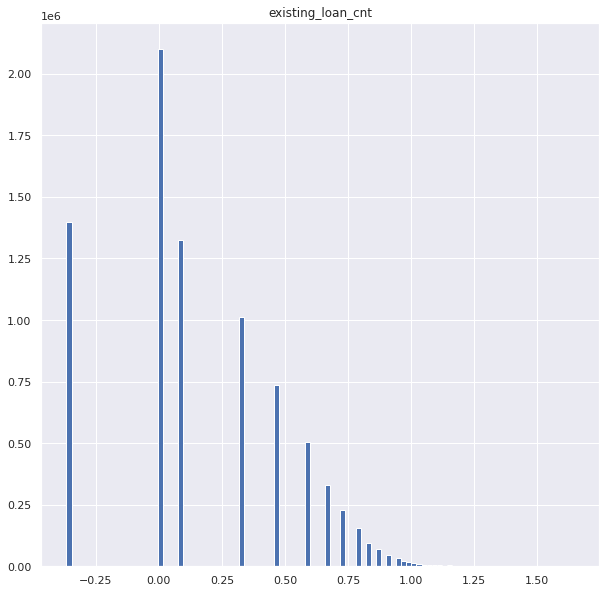

In [56]:
log_df22=np.log(log_df2['existing_loan_cnt'])
log_df22=pd.DataFrame(log_df22)
log_df22.hist(bins=100,figsize=(10,10)) #로그변환 한번 더 
plt.show()

In [57]:
log_df22.loc[log_df22['existing_loan_cnt'] != log_df22['existing_loan_cnt'], 'existing_loan_cnt'] = log_df22['existing_loan_cnt'].mean()

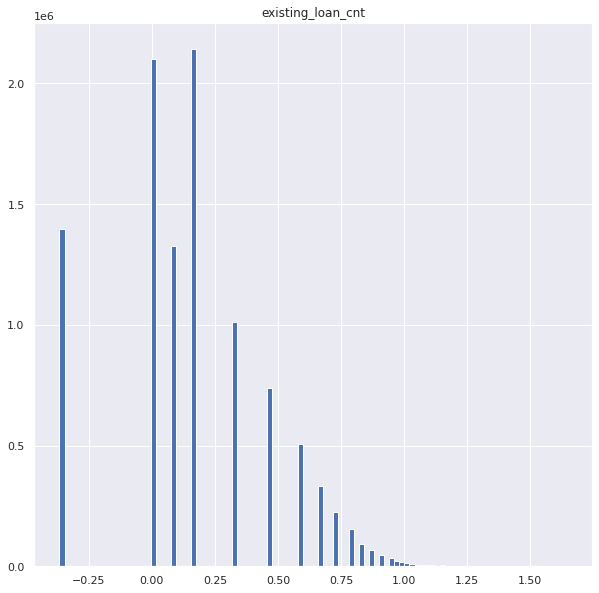

In [58]:
log_df22.hist(bins=100,figsize=(10,10))
plt.show()

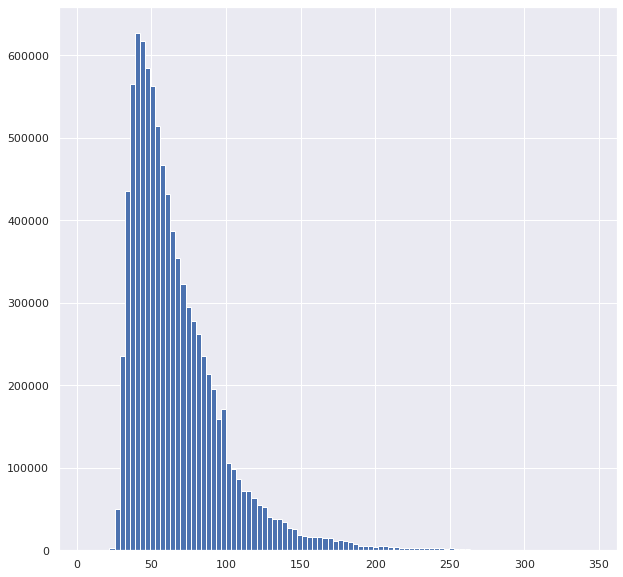

In [59]:
train_x['credit_rate2']=train_x['credit_score']/train_x['loan_rate']
train_x['credit_rate2'].hist(bins=100,figsize=(10,10))
plt.show()

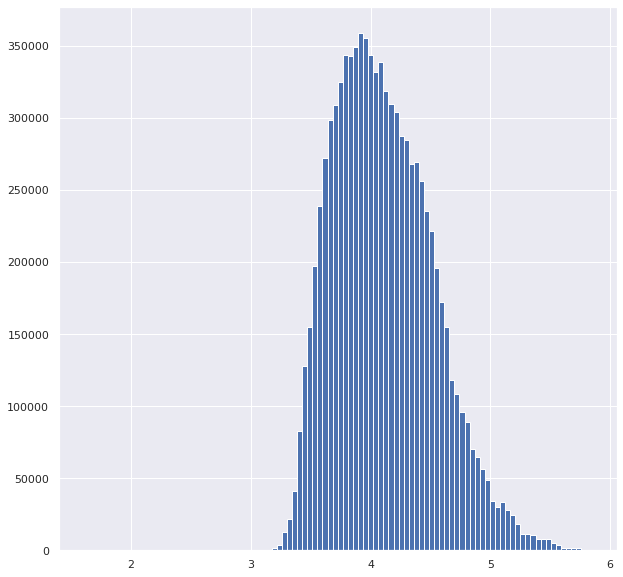

In [60]:
train_x['credit_rate2']=np.log(train_x['credit_rate2'])
train_x['credit_rate2'].hist(bins=100,figsize=(10,10))
plt.show()

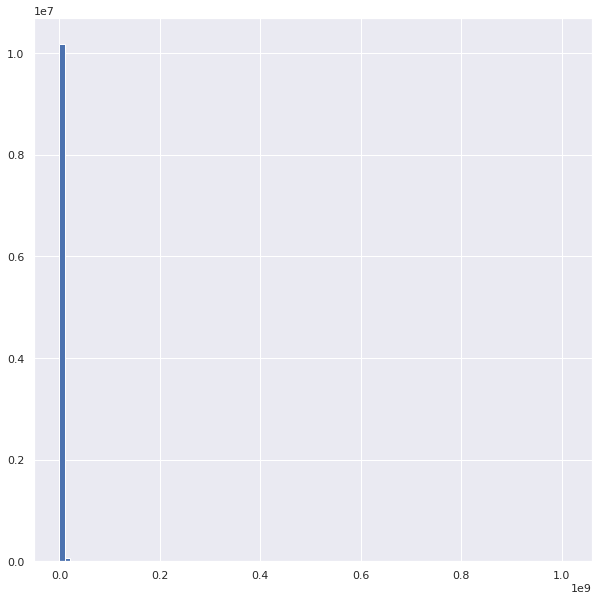

In [65]:
train_x['ss']=train_x['loan_limit']/train_x['loan_rate']
train_x['ss'].hist(bins=100,figsize=(10,10))
plt.show()

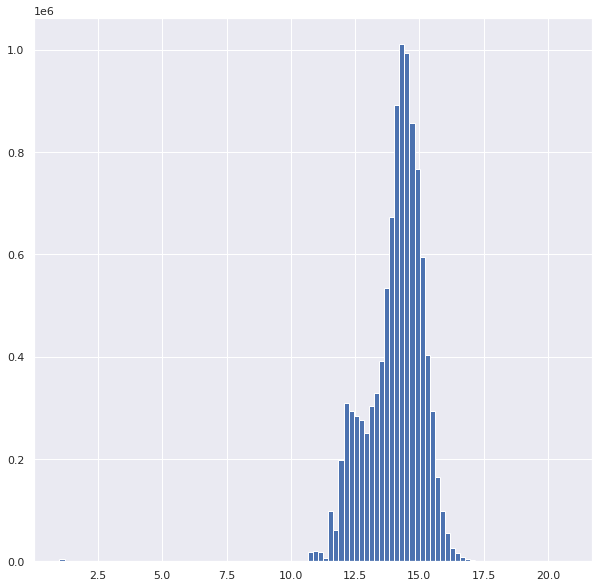

In [62]:
train_x['ss']=np.log(train_x['loan_limit']/train_x['loan_rate'])
train_x['ss']=pd.DataFrame(train_x['ss'])
train_x['ss'][(train_x['ss'] <= 0)] = 1
train_x['ss'].hist(bins=100,figsize=(10,10))
plt.show()

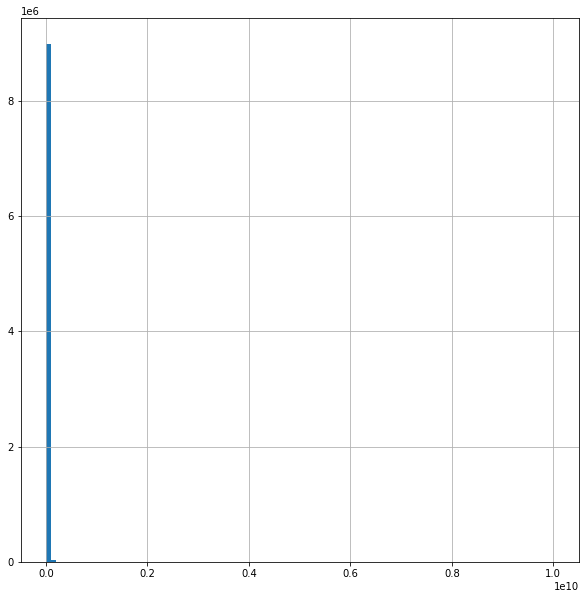

In [7]:
train_x['credit_lmit']=train_x['credit_score']+train_x['loan_limit']
train_x['credit_lmit'].hist(bins=100,figsize=(10,10))
plt.show()

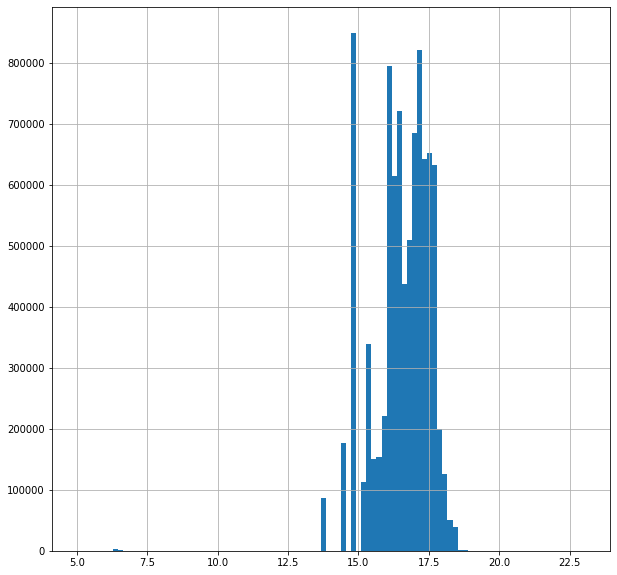

In [8]:
train_x['credit_lmit']=np.log(train_x['credit_score']+train_x['loan_limit'])
train_x['credit_lmit'].hist(bins=100,figsize=(10,10))
plt.show()